In [1]:
import requests
import geopandas as gpd
import pandas as pd
import geojson
import zipfile
import os
import shutil
import urllib, json
import pprint
import requests
import descartes
from requests.adapters import HTTPAdapter 
import operator
%matplotlib inline

In [2]:
data_t2=[
    {
        'information_type':'Cameroon - forets de productions',
        'iso3':'CMR',
        'urls':[
            {'url':'https://opendata.arcgis.com/datasets/ebeea54f498f40439d6e7f4b5a2ba7a2_172.geojson',
             'table':'table1',
             'join_Key':'nom_conces',
             'join_table':'table3'},#table 3
            {'url':'https://opendata.arcgis.com/datasets/833d7c931b7741b087257596de8232d0_160.geojson',
             'table':'table2',
             'join_Key':'globalid',
             'join_table':'table1'},#table 1
            {'url':'https://opendata.arcgis.com/datasets/663ea4a1220e4b2a82a54b1fc616a32e_131.geojson',
             'table':'table3',
             'join_Key':'nom_conces',
             'join_table':'table1'}],#table 1
        'data':None,
        'columns':[],
        'columns_selection':['geometry', 'company_name', 'Contractor_name', 'company_FAID', 'capital_origin', 'fmu_name', 'fmu_type',
                            'start_date', 'end_date', 'sawmills', 'management_doc_name', 'forest_title',
                            'validation_date', 'ccf_status', 'm_plan_status', 'num_ccf', 'open_year', 
                            'close_year', 'last_update','certification_status', 'certification_type',
                            'certification_date','iso3_fmu', 'geometries'],
        'columns_select_rename':{
            'company_name':'attributai',
            'Contractor_name':'exploitant',
            'company_FAID':'nrc_ste',
            'capital_origin':None,
            'fmu_name':'nom_foret',
            'fmu_type':'type_',
            'start_date':'date_attr',
            'end_date':None,
            'sawmills':None,
            'management_doc_name':None,
            'forest_title':'desc_type',
            'validation_date':'date_amgt',
            'ccf_status':None,
            'm_plan_status':'statu_amgt',
            'num_ccf':None,
            'open_year':None,
            'close_year':None,
            'last_update':'last_edited_date',
            'certification_status':None,
            'certification_type':'t_cert_af & t_cert_leg',
            'certification_date':'d_cert_af & d_cert_leg respectively',
            'iso3_fmu':None,
            'geometries':'shape'}
    },
    {
        'information_type':'Forest Concessions Agreeent',
        'iso3':'COG',
        'urls':[
            {'url':'https://opendata.arcgis.com/datasets/b45c429a250c4142973bc665fb95fbc2_31.geojson',
             'table':'table1',
             'join_Key':None,
             'join_table':None}],
        'data':None,
        'columns':[],
        'columns_selection':['geometry', 'company_name', 'Contractor_name', 'company_FAID', 'capital_origin', 'fmu_name', 'fmu_type',
                            'start_date', 'end_date', 'sawmills', 'management_doc_name', 'forest_title',
                            'validation_date', 'ccf_status', 'm_plan_status', 'num_ccf', 'open_year', 
                            'close_year', 'last_update','certification_status', 'certification_type',
                            'certification_date','iso3_fmu', 'geometries'],
        'columns_select_rename':{
            'company_name':'attributai',
            'Contractor_name':None,
            'company_FAID':None,
            'capital_origin':'orig_capit',
            'fmu_name':'num_ccf',
            'fmu_type':'type_',
            'start_date':'date_attr',
            'end_date':'date_echea',
            'sawmills':None,
            'management_doc_name':None,
            'forest_title':'desc_type',
            'validation_date':'date_amgt',
            'ccf_status':None,
            'm_plan_status':'statu_amgt',
            'num_ccf':None,
            'open_year':None,
            'close_year':None,
            'last_update':'last_edited_date',
            'certification_status':'statu_cert',
            'certification_type':'type_cert',
            'certification_date':'date_cert',
            'certification_date_due':'dat_ech_ce',
            'iso3_fmu':None,
            'geometries':'shape'}
    },
    {
        'information_type':'Ventes de coupe',
        'iso3':'CMR',
        'urls':[
            {'url':'https://opendata.arcgis.com/datasets/63623b2d634e4214962aef52699291a3_136.geojson',
             'table':'table1',
             'join_Key':None,
             'join_table':None},
            {'url':'https://opendata.arcgis.com/datasets/833d7c931b7741b087257596de8232d0_160.geojson',
             'table':'table2',
             'join_Key':None,
             'join_table':None}],
        'data':None,
        'columns':[],
        'columns_selection':['geometry', 'company_name', 'Contractor_name', 'company_FAID', 'capital_origin', 'fmu_name', 'fmu_type',
                            'start_date', 'end_date', 'sawmills', 'management_doc_name', 'forest_title',
                            'validation_date', 'ccf_status', 'm_plan_status', 'num_ccf', 'open_year', 
                            'close_year', 'last_update','certification_status', 'certification_type',
                            'certification_date','iso3_fmu', 'geometries'],
        'columns_select_rename':{
            'company_name':'attributai',
            'Contractor_name':'exploitant',
            'company_FAID':'nrc_ste',
            'capital_origin':None,
            'fmu_name':'nom_vc',
            'fmu_type':'type_',
            'start_date':'date_attr',
            'end_date':'date_expr',
            'sawmills':None,
            'management_doc_name':None,
            'forest_title':'desc_type',
            'validation_date':None,
            'ccf_status':None,
            'm_plan_status':None,
            'num_ccf':None,
            'open_year':None,
            'close_year':None,
            'last_update':'last_edited_date',
            'certification_status':None,
            'certification_type':None,
            'certification_date':None,
            'iso3_fmu':None,
            'geometries':'shape'}
    },
    {
        'information_type':'Concessions forestieres 1',
        'iso3':'COG',
        'urls':[
            {'url':'https://opendata.arcgis.com/datasets/1643a4bb843d4fc996ae69474f1a49dd_77.geojson',
             'table':'table1',
             'join_Key':None,
             'join_table':None}],
        'data':None,
        'columns':[],
        'columns_selection':['geometry', 'company_name', 'Contractor_name', 'company_FAID', 'capital_origin', 'fmu_name', 'fmu_type',
                            'start_date', 'end_date', 'sawmills', 'management_doc_name', 'forest_title',
                            'validation_date', 'ccf_status', 'm_plan_status', 'num_ccf', 'open_year', 
                            'close_year', 'last_update','certification_status', 'certification_type',
                            'certification_date','iso3_fmu', 'geometries'],
        'columns_select_rename':{
            'company_name':'concessionsnom_ste',
            'Contractor_name':None,
            'company_FAID':'societenrc_ste',
            'capital_origin':'societeorig_capit',
            'fmu_name':'concessionsnom_con',
            'fmu_type':'concessionstype_',
            'start_date':'concessionsdate_attri',
            'end_date':'concessionsdate_echea',
            'sawmills':None,
            'management_doc_name':None,
            'forest_title':'concessionstype_conv',
            'validation_date':'concessionsdate_amgt',
            'ccf_status':None,
            'm_plan_status':'concessionsstatu_amgt',
            'num_ccf':None,
            'open_year':'concessionsan_deb_ex',
            'close_year':'concessionsperio_rota',
            'last_update':'concessionslast_edited_date',
            'certification_status':None,
            'certification_type':'concessionstype_cert',
            'certification_date':'concessionsdate_cert',
            'iso3_fmu':None,
            'geometries':'shape'}
    },
    {
        'information_type':'Concessions forestieres 2',
        'iso3':'GAB',
        'urls':[
            {'url':'https://opendata.arcgis.com/datasets/807969a8335b44a8a30f6e1b9325cc9d_7.geojson',
             'table':'table1',
             'join_Key':None,
             'join_table':None}],
        'data':None,
        'columns':[],
        'columns_selection':['geometry', 'company_name', 'Contractor_name', 'company_FAID', 'capital_origin', 'fmu_name', 'fmu_type',
                            'start_date', 'end_date', 'sawmills', 'management_doc_name', 'forest_title',
                            'validation_date', 'ccf_status', 'm_plan_status', 'num_ccf', 'open_year', 
                            'close_year', 'last_update','certification_status', 'certification_type',
                            'certification_date','iso3_fmu', 'geometries'],
        'columns_select_rename':{
            'company_name':'nom_titul',
            'Contractor_name':None,
            'company_FAID':None,
            'capital_origin':'orig_ca',
            'fmu_name':None,
            'fmu_type':'type_',
            'start_date':'date_sign',
            'end_date':None,
            'sawmills':None,
            'management_doc_name':None,
            'forest_title':'desc_type',
            'validation_date':None,
            'ccf_status':None,
            'm_plan_status':None,
            'num_ccf':None,
            'open_year':None,
            'close_year':None,
            'last_update':'date_revis',
            'certification_status':'statu_cert',
            'certification_type':'type_cert',
            'certification_date':None,
            'iso3_fmu':None,
            'geometries':'shape'}
    },
    {
        'information_type':'Permiss d explotation et d amenagement',
        'iso3':'CAF',
        'urls':[
            {'url':'https://opendata.arcgis.com/datasets/5a6ceeec32cb4e189f7aaa6c3f19d4c7_0.geojson',
             'table':'table1',
             'join_Key':None,
             'join_table':None}],
        'data':None,
        'columns':[],
        'columns_selection':['geometry', 'company_name', 'Contractor_name', 'company_FAID', 'capital_origin', 'fmu_name', 'fmu_type',
                            'start_date', 'end_date', 'sawmills', 'management_doc_name', 'forest_title',
                            'validation_date', 'ccf_status', 'm_plan_status', 'num_ccf', 'open_year', 
                            'close_year', 'last_update','certification_status', 'certification_type',
                            'certification_date','iso3_fmu', 'geometries'],
        'columns_select_rename':{
            'company_name':'attributai',
            'Contractor_name':'exploitant',
            'company_FAID':None,
            'capital_origin':None,
            'fmu_name':'num_permis',
            'fmu_type':None,
            'start_date':'date_attr',
            'end_date':None,
            'sawmills':None,
            'management_doc_name':None,
            'forest_title':None,
            'validation_date':'date_amgt',
            'ccf_status':None,
            'm_plan_status':'statu_amgt',
            'num_ccf':None,
            'open_year':None,
            'close_year':None,
            'last_update':'last_edi_1',
            'certification_status':None,
            'certification_type':'cert_amgt',
            'certification_date':'date_cert',
            'iso3_fmu':None,
            'geometries':'shape'}
    }
    
]

## Test wih Cameroon: 

In [154]:
cameroon_test=[
    {
        'information_type':'Cameroon - forets de productions',
        'iso3':'CMR',
        'urls':[
            {'url':'https://opendata.arcgis.com/datasets/ebeea54f498f40439d6e7f4b5a2ba7a2_172.geojson',
             'table':'table1',
             'join_Key':'nom_conces',
             'join_table':'table3'},#table 3
            {'url':'https://opendata.arcgis.com/datasets/833d7c931b7741b087257596de8232d0_160.geojson',
             'table':'table2',
             'join_Key':'globalid',
             'join_table':'table1'},#table 1
            {'url':'https://opendata.arcgis.com/datasets/663ea4a1220e4b2a82a54b1fc616a32e_131.geojson',
             'table':'table3',
             'join_Key':'nom_conces',
             'join_table':'table1'}],#table 1
        'data':None,
        'columns':[],
        'columns_selection':['geometry', 'company_name', 'Contractor_name', 'company_FAID', 'capital_origin', 'fmu_name', 'fmu_type',
                            'start_date', 'end_date', 'sawmills', 'management_doc_name', 'forest_title',
                            'validation_date', 'ccf_status', 'm_plan_status', 'num_ccf', 'open_year', 
                            'close_year', 'last_update','certification_status', 'certification_type',
                            'certification_date','iso3_fmu', 'geometries'],
        'columns_select_rename':{
            'company_name':'attributai',
            'Contractor_name':'exploitant',
            'company_FAID':'nrc_ste',
            'capital_origin':None,
            'fmu_name':'nom_foret',
            'fmu_type':'type_',
            'start_date':'date_attr',
            'end_date':None,
            'sawmills':None,
            'management_doc_name':None,
            'forest_title':'desc_type',
            'validation_date':'date_amgt',
            'ccf_status':None,
            'm_plan_status':'statu_amgt',
            'num_ccf':None,
            'open_year':None,
            'close_year':None,
            'last_update':'last_edited_date',
            'certification_status':None,
            'certification_type':'t_cert_af & t_cert_leg',
            'certification_date':'d_cert_af & d_cert_leg respectively',
            'iso3_fmu':None,
            'geometries':'shape'}
    }]

In [4]:
def request(url):
    '''
    This function makes a request to an url and generates a geojson with the data
    '''
    try:
        with requests.Session() as s:
            s.mount( 'http://' , HTTPAdapter(max_retries= 3 ))
            s.mount( 'https://' , HTTPAdapter(max_retries= 3 )) 
            r =  s.get(url)
    except:
        print(f"call to {url} exited with estatus {r.status_code}" )
        raise r.status_code
    geodata=geojson.loads(geojson.dumps(r.json()))
    return geodata

In [17]:
# request manually the tables

table1 = request(cameroon_test[0]['urls'][0]['url'])
table2 = request(cameroon_test[0]['urls'][1]['url'])
table3 = request(cameroon_test[0]['urls'][2]['url'])

In [32]:
# generate the dataframes for each table and manually check the joins
table1_gdf =gpd.GeoDataFrame.from_features(table1, crs = {'init':'epsg:4326'})
table2_gdf =gpd.GeoDataFrame.from_features(table2, crs = {'init':'epsg:4326'})
table3_gdf =gpd.GeoDataFrame.from_features(table3, crs = {'init':'epsg:4326'})

In [43]:
print(f"The len of table 1 is {len(table1_gdf)}")
print(f"The len of table 2 is {len(table2_gdf)}")
print(f"The len of table 3 is {len(table3_gdf)}")

The len of table 1 is 138
The len of table 2 is 74
The len of table 3 is 181


In [31]:
table1_gdf

,attributai,b_cert_af,b_cert_leg,b_cert_tra,created_date,created_user,d_cert_af,d_cert_leg,d_cert_tra,date_amgt,...,objectid,s_cert_af,statu_amgt,statu_attr,statu_conv,sup_adm_ha,t_cert_af,t_cert_leg,t_cert_tra,type_
0,None,None,None,None,2017-11-01T09:23:08.000Z,KENDY,None,None,None,2015-08-13T00:00:00.000Z,...,242,None,Aménagé,Attribué,None,NaN,None,None,None,4110110
1,PALLISCO,None,None,None,2017-11-01T09:23:08.000Z,KENDY,None,2011-01-05T00:00:00.000Z,None,2015-08-13T00:00:00.000Z,...,243,None,Aménagé,Attribué,Convention provisoire,47241.0,None,OLB,None,4110110
2,STBK,None,None,None,2017-11-01T09:23:08.000Z,KENDY,None,None,None,2012-07-30T00:00:00.000Z,...,244,None,revise,Attribué,Convention définitive,81397.0,None,None,None,4110110
3,SIENCAM,None,None,None,2017-11-01T09:23:08.000Z,KENDY,None,None,None,2010-06-28T00:00:00.000Z,...,245,None,revise,Attribué,Convention définitive,94917.0,None,None,None,4110110
4,SEFAC,None,None,None,2017-11-01T09:23:08.000Z,KENDY,None,2010-06-30T00:00:00.000Z,None,2015-10-05T00:00:00.000Z,...,246,None,revise,Attribué,Convention définitive,66688.0,None,OLB,None,4110110
5,None,None,None,None,2017-11-01T09:23:08.000Z,KENDY,None,None,None,2006-01-01T00:00:00.000Z,...,247,None,Aménagé,Attribué,None,42612.0,None,None,None,4110110
6,DINO&FILS,None,None,None,2017-11-01T09:23:08.000Z,KENDY,None,None,None,2014-01-01T00:00:00.000Z,...,248,None,Aménagé,Attribué,Convention définitive,32293.0,None,None,None,4110110
7,None,None,None,None,2017-11-01T09:23:08.000Z,KENDY,None,None,None,2006-03-01T00:00:00.000Z,...,249,None,revise,Attribué,Convention définitive,16240.0,None,None,None,4110110
8,None,None,None,None,2017-11-01T09:23:08.000Z,KENDY,None,None,None,None,...,250,None,En cours d'elaboration,Attribué,None,80000.0,None,None,None,4110110
9,CAMBOIS,RA-FM/COC,None,None,2017-11-01T09:23:08.000Z,KENDY,2013-03-22T00:00:00.000Z,None,None,2005-02-16T00:00:00.000Z,...,251,None,Aménagé,Attribué,Convention provisoire,145585.0,FSC,None,None,4110110


In [123]:
table2_gdf['id_nat_ste']

0     CM/UNKNOWN/0145
1     CM/UNKNOWN/0146
2     CM/UNKNOWN/0147
3     CM/UNKNOWN/0148
4     CM/UNKNOWN/0149
5     CM/UNKNOWN/0150
6     CM/UNKNOWN/0151
7     CM/UNKNOWN/0152
8     CM/UNKNOWN/0153
9     CM/UNKNOWN/0154
10    CM/UNKNOWN/0155
11    CM/UNKNOWN/0156
12    CM/UNKNOWN/0157
13    CM/UNKNOWN/0158
14    CM/UNKNOWN/0159
15    CM/UNKNOWN/0160
16    CM/UNKNOWN/0161
17    CM/UNKNOWN/0162
18    CM/UNKNOWN/0163
19    CM/UNKNOWN/0164
20    CM/UNKNOWN/0165
21    CM/UNKNOWN/0166
22    CM/UNKNOWN/0167
23    CM/UNKNOWN/0168
24    CM/UNKNOWN/0169
25    CM/UNKNOWN/0170
26    CM/UNKNOWN/0195
27    CM/UNKNOWN/0172
28    CM/UNKNOWN/0173
29    CM/UNKNOWN/0174
           ...       
44    CM/UNKNOWN/0189
45    CM/UNKNOWN/0190
46    CM/UNKNOWN/0191
47    CM/UNKNOWN/0192
48    CM/UNKNOWN/0193
49    CM/UNKNOWN/0194
50    CM/UNKNOWN/0195
51    CM/UNKNOWN/0196
52    CM/UNKNOWN/0197
53    CM/UNKNOWN/0198
54    CM/UNKNOWN/0199
55    CM/UNKNOWN/0200
56    CM/UNKNOWN/0201
57    CM/UNKNOWN/0202
58    CM/U

In [34]:
# The fmu_names (and obviously the fmus) are in the table 3
table3_gdf

,date_class,desc_type,geometry,last_edited_date,nom_conces,nom_foret,objectid,rfa_ha,statu_class,sup_adm_ha,sup_sig_ha,type_
0,None,Forêt communale,(POLYGON ((11.05769802600003 3.269007207000072...,2018-02-14T09:19:30.000Z,1498,Mvengue,164,NaN,Classé,36726.0,37875.0,4110200
1,2014-07-31T00:00:00.000Z,Forêt communale,"POLYGON ((13.32378718400003 2.569107108000026,...",2018-01-10T15:14:29.000Z,1499,MINTOM,764,NaN,Classé,41455.0,41619.0,4110200
2,2010-12-31T00:00:00.000Z,Forêt communale,"POLYGON ((13.08509290300003 3.810681729000066,...",2018-02-02T09:34:54.000Z,1484,MESSAMENA-MINDOUROU,766,0.0,Classé,36508.0,36151.0,4110200
3,2005-01-26T00:00:00.000Z,UFA,"POLYGON ((15.26389320100003 3.450826552000024,...",2017-11-01T15:18:26.000Z,1025,10-001,767,1500.0,Classé,69018.0,69612.0,4110100
4,2014-12-04T00:00:00.000Z,UFA,(POLYGON ((12.79310471400004 2.911655873000029...,2017-12-06T14:38:51.000Z,1073,09-007,768,1500.0,Classé,40057.0,39760.0,4110100
5,2009-11-16T00:00:00.000Z,Forêt communale,(POLYGON ((12.41282886100004 4.990252471000076...,2018-01-10T15:18:25.000Z,1482,NANGA EBOKO,769,0.0,Classé,20000.0,19447.0,4110200
6,None,UFA,"POLYGON ((10.66874356700004 6.98578911200002, ...",2018-01-10T16:34:28.000Z,None,13-001,770,0.0,En cours de classement,46687.0,46438.0,4110100
7,2016-01-29T00:00:00.000Z,Forêt communale,"POLYGON ((10.74384519000006 3.469234110000059,...",2019-08-21T09:17:36.000Z,1495,Bipindi et Lolodorf,771,0.0,Classé,47547.0,47604.0,4110200
8,2011-08-11T00:00:00.000Z,UFA,(POLYGON ((10.07395820100004 3.126318900000058...,2017-11-01T15:18:13.000Z,1082,09-028,772,1500.0,Classé,28961.0,28957.0,4110100
9,2014-12-04T00:00:00.000Z,UFA,"POLYGON ((11.86297546900005 2.750244911000038,...",2017-11-01T15:16:24.000Z,1035,09-015,773,1500.0,Classé,40368.0,40391.0,4110100


### Check the row 22 for nom_concess:

In [49]:
# check from table 1 and table 3 the concession name for row22 1488
table3_gdf[table3_gdf['nom_conces']=='1488']

,date_class,desc_type,geometry,last_edited_date,nom_conces,nom_foret,objectid,rfa_ha,statu_class,sup_adm_ha,sup_sig_ha,type_


In [50]:
table1_gdf[table1_gdf['nom_conces']=='1488']

,attributai,b_cert_af,b_cert_leg,b_cert_tra,created_date,created_user,d_cert_af,d_cert_leg,d_cert_tra,date_amgt,...,objectid,s_cert_af,statu_amgt,statu_attr,statu_conv,sup_adm_ha,t_cert_af,t_cert_leg,t_cert_tra,type_
28,None,None,None,None,2017-11-01T09:23:08.000Z,KENDY,None,None,None,None,...,270,None,Aménagé,Attribué,None,NaN,None,None,None,4110110


### Generate a inner join of table 1 and table 3 just to keep the values that are common for both tables:

In [139]:
# FP and CF join by 'nom_conces' (table1 and table 3)
# looking at the Forest Atlas data, it looks like 1 forest concession can include several FMUs (editado) 
#or no FMU at all

table13 = pd.merge(table3_gdf,table1_gdf, on='nom_conces',how='inner')

In [140]:
print(f"The len of the inner merge of table 1 and table 3 is {len(table13)}")
print(f"""Theprevious len of table 1 was {len(table1_gdf)} and table 3 was {len(table3_gdf)}
which means that we have removed the concession names withouth fmu's, keeping the concession
names with multiple fmus""")


The len of the inner merge of table 1 and table 3 is 150
Theprevious len of table 1 was 138 and table 3 was 181
which means that we have removed the concession names withouth fmu's, keeping the concession
names with multiple fmus


In [141]:
table13

,date_class,desc_type_x,geometry_x,last_edited_date_x,nom_conces,nom_foret,objectid_x,rfa_ha,statu_class,sup_adm_ha_x,...,objectid_y,s_cert_af,statu_amgt,statu_attr,statu_conv,sup_adm_ha_y,t_cert_af,t_cert_leg,t_cert_tra,type__y
0,None,Forêt communale,(POLYGON ((11.05769802600003 3.269007207000072...,2018-02-14T09:19:30.000Z,1498,Mvengue,164,NaN,Classé,36726.0,...,252,None,Aménagé,Attribué,None,NaN,None,None,None,4110110
1,2014-07-31T00:00:00.000Z,Forêt communale,"POLYGON ((13.32378718400003 2.569107108000026,...",2018-01-10T15:14:29.000Z,1499,MINTOM,764,NaN,Classé,41455.0,...,260,None,Aménagé,Attribué,None,NaN,None,None,None,4110110
2,2010-12-31T00:00:00.000Z,Forêt communale,"POLYGON ((13.08509290300003 3.810681729000066,...",2018-02-02T09:34:54.000Z,1484,MESSAMENA-MINDOUROU,766,0.0,Classé,36508.0,...,359,None,Aménagé,Attribué,None,36507.0,None,None,None,4110110
3,2005-01-26T00:00:00.000Z,UFA,"POLYGON ((15.26389320100003 3.450826552000024,...",2017-11-01T15:18:26.000Z,1025,10-001,767,1500.0,Classé,69018.0,...,292,None,revise,Attribué,Convention définitive,193105.0,None,"OLB, VLC",None,4110110
4,2005-01-26T00:00:00.000Z,UFA,"POLYGON ((15.51898976400003 3.428152686000033,...",2017-11-01T15:18:41.000Z,1025,10-004,881,1500.0,Classé,52473.0,...,292,None,revise,Attribué,Convention définitive,193105.0,None,"OLB, VLC",None,4110110
5,2005-01-26T00:00:00.000Z,UFA,"POLYGON ((15.14852019100005 3.295611867000048,...",2017-11-01T15:18:30.000Z,1025,10-002,887,1500.0,Classé,22784.0,...,292,None,revise,Attribué,Convention définitive,193105.0,None,"OLB, VLC",None,4110110
6,2005-01-26T00:00:00.000Z,UFA,"POLYGON ((15.36043260700006 3.243808263000062,...",2017-12-06T14:41:21.000Z,1025,10-003,1751,1500.0,Classé,48830.0,...,292,None,revise,Attribué,Convention définitive,193105.0,None,"OLB, VLC",None,4110110
7,2014-12-04T00:00:00.000Z,UFA,(POLYGON ((12.79310471400004 2.911655873000029...,2017-12-06T14:38:51.000Z,1073,09-007,768,1500.0,Classé,40057.0,...,346,None,Aménagé,Attribué,Convention provisoire,89017.0,None,None,None,4110110
8,2014-12-04T00:00:00.000Z,UFA,"POLYGON ((12.63303657000006 2.97206957800006, ...",2017-12-06T14:40:32.000Z,1073,09-008,866,1500.0,Classé,35309.0,...,346,None,Aménagé,Attribué,Convention provisoire,89017.0,None,None,None,4110110
9,2009-11-16T00:00:00.000Z,Forêt communale,(POLYGON ((12.41282886100004 4.990252471000076...,2018-01-10T15:18:25.000Z,1482,NANGA EBOKO,769,0.0,Classé,20000.0,...,305,None,Aménagé,Attribué,None,20000.0,None,None,None,4110110


In [142]:
# Check values keys from table to do the final join
table13.keys()

Index(['date_class', 'desc_type_x', 'geometry_x', 'last_edited_date_x',
       'nom_conces', 'nom_foret', 'objectid_x', 'rfa_ha', 'statu_class',
       'sup_adm_ha_x', 'sup_sig_ha', 'type__x', 'attributai', 'b_cert_af',
       'b_cert_leg', 'b_cert_tra', 'created_date', 'created_user', 'd_cert_af',
       'd_cert_leg', 'd_cert_tra', 'date_amgt', 'date_attr', 'date_con_d',
       'date_con_p', 'desc_type_y', 'exploitant', 'geometry_y', 'globalid',
       'last_edited_date_y', 'last_edited_user', 'objectid_y', 's_cert_af',
       'statu_amgt', 'statu_attr', 'statu_conv', 'sup_adm_ha_y', 't_cert_af',
       't_cert_leg', 't_cert_tra', 'type__y'],
      dtype='object')

In [143]:
table2_gdf.keys()

Index(['created_date', 'created_user', 'desc_type', 'geometry', 'globalid',
       'id_nat_ste', 'last_edited_date', 'last_edited_user', 'localite',
       'nom_groupe', 'nrc_ste', 'objectid', 'societe', 'type_'],
      dtype='object')

In [144]:
table13

,date_class,desc_type_x,geometry_x,last_edited_date_x,nom_conces,nom_foret,objectid_x,rfa_ha,statu_class,sup_adm_ha_x,...,objectid_y,s_cert_af,statu_amgt,statu_attr,statu_conv,sup_adm_ha_y,t_cert_af,t_cert_leg,t_cert_tra,type__y
0,None,Forêt communale,(POLYGON ((11.05769802600003 3.269007207000072...,2018-02-14T09:19:30.000Z,1498,Mvengue,164,NaN,Classé,36726.0,...,252,None,Aménagé,Attribué,None,NaN,None,None,None,4110110
1,2014-07-31T00:00:00.000Z,Forêt communale,"POLYGON ((13.32378718400003 2.569107108000026,...",2018-01-10T15:14:29.000Z,1499,MINTOM,764,NaN,Classé,41455.0,...,260,None,Aménagé,Attribué,None,NaN,None,None,None,4110110
2,2010-12-31T00:00:00.000Z,Forêt communale,"POLYGON ((13.08509290300003 3.810681729000066,...",2018-02-02T09:34:54.000Z,1484,MESSAMENA-MINDOUROU,766,0.0,Classé,36508.0,...,359,None,Aménagé,Attribué,None,36507.0,None,None,None,4110110
3,2005-01-26T00:00:00.000Z,UFA,"POLYGON ((15.26389320100003 3.450826552000024,...",2017-11-01T15:18:26.000Z,1025,10-001,767,1500.0,Classé,69018.0,...,292,None,revise,Attribué,Convention définitive,193105.0,None,"OLB, VLC",None,4110110
4,2005-01-26T00:00:00.000Z,UFA,"POLYGON ((15.51898976400003 3.428152686000033,...",2017-11-01T15:18:41.000Z,1025,10-004,881,1500.0,Classé,52473.0,...,292,None,revise,Attribué,Convention définitive,193105.0,None,"OLB, VLC",None,4110110
5,2005-01-26T00:00:00.000Z,UFA,"POLYGON ((15.14852019100005 3.295611867000048,...",2017-11-01T15:18:30.000Z,1025,10-002,887,1500.0,Classé,22784.0,...,292,None,revise,Attribué,Convention définitive,193105.0,None,"OLB, VLC",None,4110110
6,2005-01-26T00:00:00.000Z,UFA,"POLYGON ((15.36043260700006 3.243808263000062,...",2017-12-06T14:41:21.000Z,1025,10-003,1751,1500.0,Classé,48830.0,...,292,None,revise,Attribué,Convention définitive,193105.0,None,"OLB, VLC",None,4110110
7,2014-12-04T00:00:00.000Z,UFA,(POLYGON ((12.79310471400004 2.911655873000029...,2017-12-06T14:38:51.000Z,1073,09-007,768,1500.0,Classé,40057.0,...,346,None,Aménagé,Attribué,Convention provisoire,89017.0,None,None,None,4110110
8,2014-12-04T00:00:00.000Z,UFA,"POLYGON ((12.63303657000006 2.97206957800006, ...",2017-12-06T14:40:32.000Z,1073,09-008,866,1500.0,Classé,35309.0,...,346,None,Aménagé,Attribué,Convention provisoire,89017.0,None,None,None,4110110
9,2009-11-16T00:00:00.000Z,Forêt communale,(POLYGON ((12.41282886100004 4.990252471000076...,2018-01-10T15:18:25.000Z,1482,NANGA EBOKO,769,0.0,Classé,20000.0,...,305,None,Aménagé,Attribué,None,20000.0,None,None,None,4110110


In [133]:
unique_globalid=[]
duplicated=[]
for el in table13['globalid']:
    if el not in unique_globalid:
        unique_globalid.append(el)
    else:
        duplicated.append(el)

In [134]:
table13 = table13[['attributai', 'b_cert_af', 'b_cert_leg', 'b_cert_tra', 'created_date',
       'created_user', 'd_cert_af', 'd_cert_leg', 'd_cert_tra', 'date_amgt',
       'date_attr', 'date_con_d', 'date_con_p', 'desc_type_x', 'exploitant',
       'globalid', 'last_edited_date_x', 'last_edited_user',
       'nom_conces', 'objectid_x', 's_cert_af', 'statu_amgt', 'statu_attr',
       'statu_conv', 'sup_adm_ha_x', 't_cert_af', 't_cert_leg', 't_cert_tra',
       'type__x', 'date_class', 'desc_type_y', 'geometry_y',
       'last_edited_date_y', 'nom_foret', 'objectid_y', 'rfa_ha',
       'statu_class', 'sup_adm_ha_y', 'sup_sig_ha', 'type__y']]

In [145]:
table13 = table13.rename(columns={'geometry_x':'geometry'})

In [146]:
table13.set_geometry('geometry')

,date_class,desc_type_x,geometry,last_edited_date_x,nom_conces,nom_foret,objectid_x,rfa_ha,statu_class,sup_adm_ha_x,...,objectid_y,s_cert_af,statu_amgt,statu_attr,statu_conv,sup_adm_ha_y,t_cert_af,t_cert_leg,t_cert_tra,type__y
0,None,Forêt communale,(POLYGON ((11.05769802600003 3.269007207000072...,2018-02-14T09:19:30.000Z,1498,Mvengue,164,NaN,Classé,36726.0,...,252,None,Aménagé,Attribué,None,NaN,None,None,None,4110110
1,2014-07-31T00:00:00.000Z,Forêt communale,"POLYGON ((13.32378718400003 2.569107108000026,...",2018-01-10T15:14:29.000Z,1499,MINTOM,764,NaN,Classé,41455.0,...,260,None,Aménagé,Attribué,None,NaN,None,None,None,4110110
2,2010-12-31T00:00:00.000Z,Forêt communale,"POLYGON ((13.08509290300003 3.810681729000066,...",2018-02-02T09:34:54.000Z,1484,MESSAMENA-MINDOUROU,766,0.0,Classé,36508.0,...,359,None,Aménagé,Attribué,None,36507.0,None,None,None,4110110
3,2005-01-26T00:00:00.000Z,UFA,"POLYGON ((15.26389320100003 3.450826552000024,...",2017-11-01T15:18:26.000Z,1025,10-001,767,1500.0,Classé,69018.0,...,292,None,revise,Attribué,Convention définitive,193105.0,None,"OLB, VLC",None,4110110
4,2005-01-26T00:00:00.000Z,UFA,"POLYGON ((15.51898976400003 3.428152686000033,...",2017-11-01T15:18:41.000Z,1025,10-004,881,1500.0,Classé,52473.0,...,292,None,revise,Attribué,Convention définitive,193105.0,None,"OLB, VLC",None,4110110
5,2005-01-26T00:00:00.000Z,UFA,"POLYGON ((15.14852019100005 3.295611867000048,...",2017-11-01T15:18:30.000Z,1025,10-002,887,1500.0,Classé,22784.0,...,292,None,revise,Attribué,Convention définitive,193105.0,None,"OLB, VLC",None,4110110
6,2005-01-26T00:00:00.000Z,UFA,"POLYGON ((15.36043260700006 3.243808263000062,...",2017-12-06T14:41:21.000Z,1025,10-003,1751,1500.0,Classé,48830.0,...,292,None,revise,Attribué,Convention définitive,193105.0,None,"OLB, VLC",None,4110110
7,2014-12-04T00:00:00.000Z,UFA,(POLYGON ((12.79310471400004 2.911655873000029...,2017-12-06T14:38:51.000Z,1073,09-007,768,1500.0,Classé,40057.0,...,346,None,Aménagé,Attribué,Convention provisoire,89017.0,None,None,None,4110110
8,2014-12-04T00:00:00.000Z,UFA,"POLYGON ((12.63303657000006 2.97206957800006, ...",2017-12-06T14:40:32.000Z,1073,09-008,866,1500.0,Classé,35309.0,...,346,None,Aménagé,Attribué,Convention provisoire,89017.0,None,None,None,4110110
9,2009-11-16T00:00:00.000Z,Forêt communale,(POLYGON ((12.41282886100004 4.990252471000076...,2018-01-10T15:18:25.000Z,1482,NANGA EBOKO,769,0.0,Classé,20000.0,...,305,None,Aménagé,Attribué,None,20000.0,None,None,None,4110110


In [147]:
geometry_13=table13['geometry']
table13_gdf = gpd.GeoDataFrame(table13,geometry=geometry_13, crs = {'init':'epsg:4326'})

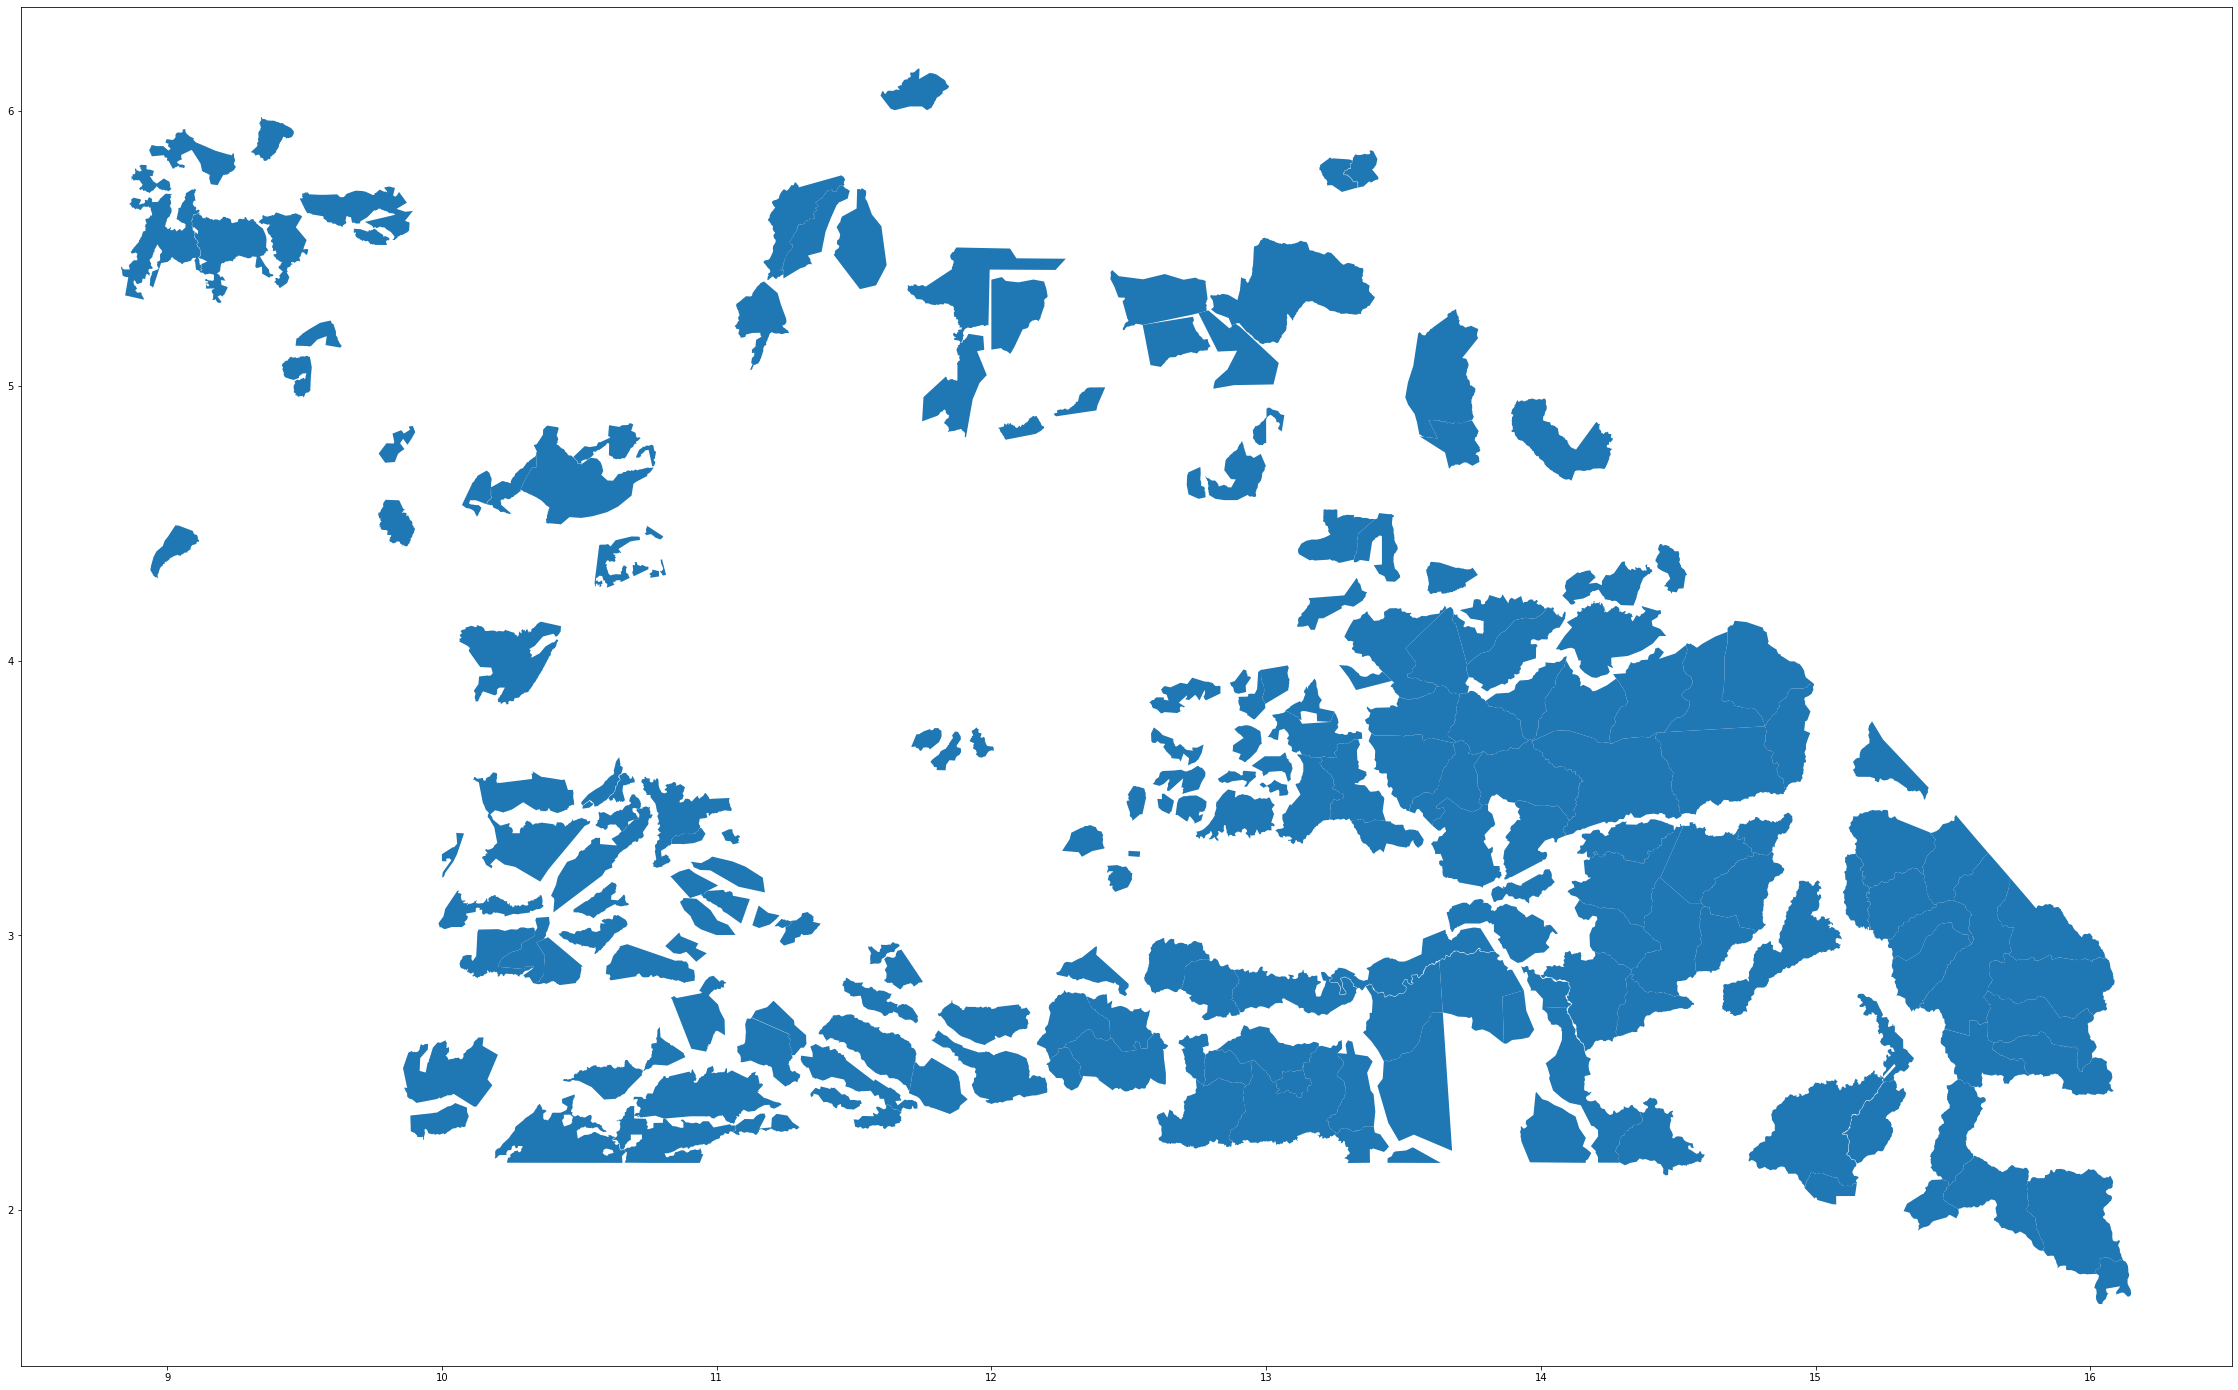

In [148]:
table13_gdf.plot(figsize=(50, 25))

In [158]:
cameroon_test[0]['data']=table13_gdf

In [159]:
cameroon_test[0]['columns']=cameroon_test[0]['data'].columns.values

In [160]:
concessions = cameroon_test[0]['data']

In [161]:
nullcolumns=[v for k,v in cameroon_test[0]['columns_select_rename'].items()]

In [163]:
diff_cols = set(nullcolumns) - set(cameroon_test[0]['columns'])

In [165]:
concessions['iso3_fmu'] = cameroon_test[0]['iso3']# renames the columns

In [166]:
concessions.rename(columns={v: k  for k, v in cameroon_test[0]['columns_select_rename'].items() if v != None}, inplace=True)

In [167]:
Cameroon_FP=[]

In [168]:
concessions

,date_class,desc_type_x,geometry,last_edited_date_x,nom_conces,fmu_name,objectid_x,rfa_ha,statu_class,sup_adm_ha_x,...,s_cert_af,m_plan_status,statu_attr,statu_conv,sup_adm_ha_y,t_cert_af,t_cert_leg,t_cert_tra,type__y,iso3_fmu
0,None,Forêt communale,(POLYGON ((11.05769802600003 3.269007207000072...,2018-02-14T09:19:30.000Z,1498,Mvengue,164,NaN,Classé,36726.0,...,None,Aménagé,Attribué,None,NaN,None,None,None,4110110,CMR
1,2014-07-31T00:00:00.000Z,Forêt communale,"POLYGON ((13.32378718400003 2.569107108000026,...",2018-01-10T15:14:29.000Z,1499,MINTOM,764,NaN,Classé,41455.0,...,None,Aménagé,Attribué,None,NaN,None,None,None,4110110,CMR
2,2010-12-31T00:00:00.000Z,Forêt communale,"POLYGON ((13.08509290300003 3.810681729000066,...",2018-02-02T09:34:54.000Z,1484,MESSAMENA-MINDOUROU,766,0.0,Classé,36508.0,...,None,Aménagé,Attribué,None,36507.0,None,None,None,4110110,CMR
3,2005-01-26T00:00:00.000Z,UFA,"POLYGON ((15.26389320100003 3.450826552000024,...",2017-11-01T15:18:26.000Z,1025,10-001,767,1500.0,Classé,69018.0,...,None,revise,Attribué,Convention définitive,193105.0,None,"OLB, VLC",None,4110110,CMR
4,2005-01-26T00:00:00.000Z,UFA,"POLYGON ((15.51898976400003 3.428152686000033,...",2017-11-01T15:18:41.000Z,1025,10-004,881,1500.0,Classé,52473.0,...,None,revise,Attribué,Convention définitive,193105.0,None,"OLB, VLC",None,4110110,CMR
5,2005-01-26T00:00:00.000Z,UFA,"POLYGON ((15.14852019100005 3.295611867000048,...",2017-11-01T15:18:30.000Z,1025,10-002,887,1500.0,Classé,22784.0,...,None,revise,Attribué,Convention définitive,193105.0,None,"OLB, VLC",None,4110110,CMR
6,2005-01-26T00:00:00.000Z,UFA,"POLYGON ((15.36043260700006 3.243808263000062,...",2017-12-06T14:41:21.000Z,1025,10-003,1751,1500.0,Classé,48830.0,...,None,revise,Attribué,Convention définitive,193105.0,None,"OLB, VLC",None,4110110,CMR
7,2014-12-04T00:00:00.000Z,UFA,(POLYGON ((12.79310471400004 2.911655873000029...,2017-12-06T14:38:51.000Z,1073,09-007,768,1500.0,Classé,40057.0,...,None,Aménagé,Attribué,Convention provisoire,89017.0,None,None,None,4110110,CMR
8,2014-12-04T00:00:00.000Z,UFA,"POLYGON ((12.63303657000006 2.97206957800006, ...",2017-12-06T14:40:32.000Z,1073,09-008,866,1500.0,Classé,35309.0,...,None,Aménagé,Attribué,Convention provisoire,89017.0,None,None,None,4110110,CMR
9,2009-11-16T00:00:00.000Z,Forêt communale,(POLYGON ((12.41282886100004 4.990252471000076...,2018-01-10T15:18:25.000Z,1482,NANGA EBOKO,769,0.0,Classé,20000.0,...,None,Aménagé,Attribué,None,20000.0,None,None,None,4110110,CMR


In [169]:
Cameroon_FP.append(concessions.loc[:,cameroon_test[0]['columns_selection']])

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [170]:
dataType=cameroon_test[0]['information_type']

In [171]:
outFile=pd.concat(Cameroon_FP)

#filters the geometry by polygon and multipolygon, removing the lines and points
polys = outFile[outFile['geometry'].geom_type == 'Polygon']
mpolys = outFile[outFile['geometry'].geom_type == 'MultiPolygon']
polys_geom=polys.get('geometry')
mpolys_geom=mpolys.get('geometry')

#merge and generates the imported geodataframe
polys_gdf=gpd.GeoDataFrame(polys,geometry=polys_geom,crs = {'init':'epsg:4326'})
mpolys_gdf=gpd.GeoDataFrame(mpolys,geometry=mpolys_geom,crs = {'init':'epsg:4326'})
new_gdf_concat=pd.concat([polys_gdf,mpolys_gdf])

#generates the new dataframe, removing the empy geometries
new_gdf_concat.to_file('./cameroon_fp/cameroon_fp.shp', driver='ESRI Shapefile')
# This geodataframe is uploaded ans implified in mapshaper (10% settings) and downloaded as geojson


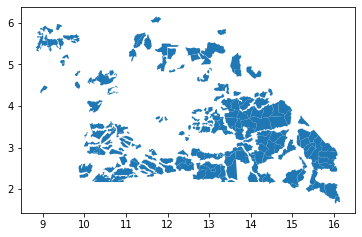

In [173]:
new_gdf_concat.plot()

In [176]:
new_gdf_concat

,geometry,company_name,Contractor_name,company_FAID,capital_origin,fmu_name,fmu_type,start_date,end_date,sawmills,...,m_plan_status,num_ccf,open_year,close_year,last_update,certification_status,certification_type,certification_date,iso3_fmu,geometries
1,"POLYGON ((13.32378718400003 2.569107108000026,...",None,None,NaN,NaN,MINTOM,NaN,None,NaN,NaN,...,Aménagé,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CMR,NaN
2,"POLYGON ((13.08509290300003 3.810681729000066,...",None,None,NaN,NaN,MESSAMENA-MINDOUROU,NaN,2010-09-17T00:00:00.000Z,NaN,NaN,...,Aménagé,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CMR,NaN
3,"POLYGON ((15.26389320100003 3.450826552000024,...",CFC,CFC,NaN,NaN,10-001,NaN,1996-08-13T00:00:00.000Z,NaN,NaN,...,revise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CMR,NaN
4,"POLYGON ((15.51898976400003 3.428152686000033,...",CFC,CFC,NaN,NaN,10-004,NaN,1996-08-13T00:00:00.000Z,NaN,NaN,...,revise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CMR,NaN
5,"POLYGON ((15.14852019100005 3.295611867000048,...",CFC,CFC,NaN,NaN,10-002,NaN,1996-08-13T00:00:00.000Z,NaN,NaN,...,revise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CMR,NaN
6,"POLYGON ((15.36043260700006 3.243808263000062,...",CFC,CFC,NaN,NaN,10-003,NaN,1996-08-13T00:00:00.000Z,NaN,NaN,...,revise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CMR,NaN
8,"POLYGON ((12.63303657000006 2.97206957800006, ...",SOCIB,SOCIB,NaN,NaN,09-008,NaN,2005-12-14T00:00:00.000Z,NaN,NaN,...,Aménagé,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CMR,NaN
10,"POLYGON ((10.74384519000006 3.469234110000059,...",None,None,NaN,NaN,Bipindi et Lolodorf,NaN,None,NaN,NaN,...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CMR,NaN
12,"POLYGON ((11.86297546900005 2.750244911000038,...",SN COCAM,SN COCAM,NaN,NaN,09-015,NaN,2000-07-01T00:00:00.000Z,NaN,NaN,...,Aménagé,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CMR,NaN
13,"POLYGON ((14.10885752400003 2.938803618000065,...",None,None,NaN,NaN,10-028,NaN,2012-08-28T00:00:00.000Z,NaN,NaN,...,Aménagé,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CMR,NaN


In [177]:
new_gdf_concat.to_file('./cameroon_fp/cameroon_fp.geojson', driver='GeoJSON')